# Introduction/Business Problem

In most countries, insurance plans are mandatory for every citizen. Therefore, insurance market is one of the most vluable market around the world. But insurance companies need to know how to evaluate their clients and maximize their effectiveness. In this case Data Science can offer an additional tool to solve this problem. Having a modern way to determine wheather a potential client is healthy or has the possibility to develop health problems, can save time and money for the insurance companies. 

# The case

With this project we are going to use a machine learning tool to try and classify several client cases according to their metrics statistics and demographics. For the needs of this project, we will classify the clients as healthy or as prone to develop a heart condition. Using the data we are going to train a machine learning algorythm to classify anonymous clients as healthy or not, and then check the accuracy of our model. 

# The Goal

Using a dataset that contains several statistics of anonymous clients, we will try to achieve a satisfying accuracy. The goal is to target the clients prone to heart diseases and then reach for medical consulting for these clients in order to value their insurance plan accordincly. This is a project that will be primarly used to detect heart diseases and if the usage works according to the plan, it can be later used for further examination. Note that we will have to evaluate the model with later feedback. In case the insurance company wants to proceed to use the model for other diseases, the current dataset needs to be updted with more statistics and used to classify other conditions.

# The Data

The dataset can be found in kaggle, in this link https://www.kaggle.com/ronitf/heart-disease-uci . There are medical measures and demographics of 303 patients. These are real data obtained from hositals. There are 13 independent attributes and the class, or the dependent variable, is the 'target' attibute of the dataset. These attributes are described as 
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defec

The class of the dataset, consist of 0, in case the heart of the patient is healty, or 1 of the patient suffers of a heart disease.

# Exploring the data

First, lets insert the dataset in the notebook.

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.

body = client_22fb5099a3be469aaac5acf0e73e7b0c.get_object(Bucket='courseracapstone-donotdelete-pr-putkuk07ddhk3c',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Secondly, lets import the necessary libraries and check if the attributes are of useful type.

In [6]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As every attribute has numerical value, we can use it in the machine learning algorithm algorithm. Now lets explore if there is any missing value in the dataset.

In [8]:
df.isnull().values.any()

False

There are no missing values therefore we can proceed to use them

# Methodology 

The analysis is performed in real world patients and their medical statistics. As for the features of the dataset, they are recommended by the medical professionals as mandatory indexes in order to explore the possibility of a patient having heart condition. Therefore we are not going to remove any feature

# The Algorithm

In this case, we want to use the algorithm in order to classify the patients in 2 categories. Those that are prone to heart conditions and those who are healthy. In that case, we decided to use the machine learning algorithm SVM, Support Vector Machine. SVM is an algorithm that among others, can exceptionally perform classification analysis. Our target is to achieve a satisfying accuracy with our model. That means that we want to be accurate for at least 75% of the cases examined. Note that the accuracy can be increased if we use larger dataset. In case the modeis not accurate enough, we will perform analysis with a different algorithm.

# The Process

In order to use the dataset in the SVM, we have to manipulate the data so that we use some of the records as training data and later use the remaining for testing the accuracy. After validating that the accuracy is satisfying our goal, we can use the whole dataset as training data and then examine any new unclassified case.
We split the sets in test and train set. We choose to use 80% of the records to train the model and then the remaining 20% to test the accuracy of the model. That said, there are used 242 records to train and 61 records to test the SVM model that will be created. Then we fit the sets  on the SVM and we extract the predicted class for the test set.

# Results 

After using the trainng set to train the model, that is to find the relationship between the parameters that classify every record as healthy or not healthy for the records that we already know their class, the model predicts the class of the records of the test set. Of course we already know he class of the records that we use to test the model. The results are shownn in the confusion matrix below.

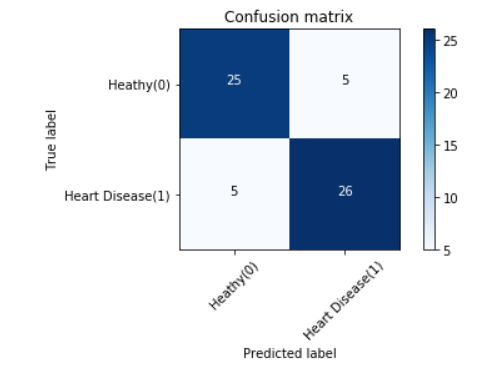

The model correctly predicted 25 healthy patients out of the 30 and 25 patients suffering from heart disease out of the 31. Later we measure the accuracy using the f1 score and the jaccard similarity indexes. Using those indexes we found that the model accurately predicts 83% of the cases.

# Conclusion

Our goal is to build a model that will help the insurance company to identify some potential client's heart conditions and then refer them to medical experts fo further evaluation. That way the company can save valuable time and money. This model predicted accurately 83% of the cases. This rate is satisfying our goal and can be used to initiate a digital trasformation for the insurance company. Later the dataset can be expanded using new clients statistics and records, or even use more 